###### The cell below loads the visual style of the notebook when run.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/styles.css'
HTML(open(css_file, "r").read())

# Understanding Image Scaling and Display

We'll start by downloading the same image used in the main tutorial and reading the fits file.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=False)
image_data = fits.getdata(image_file)

The ```image_data``` array is a two-dimensional array. Each entry is a number representing the flux falling on that pixel of the CCD. When we display the image, we have to choose a [colormap](../../resources/reference.html#colormap) - a mapping between the number in the array, and the color in the image. 

In the example below, this colormap is a linear grayscale, with black representing the smallest value in the image_data, and white the largest.

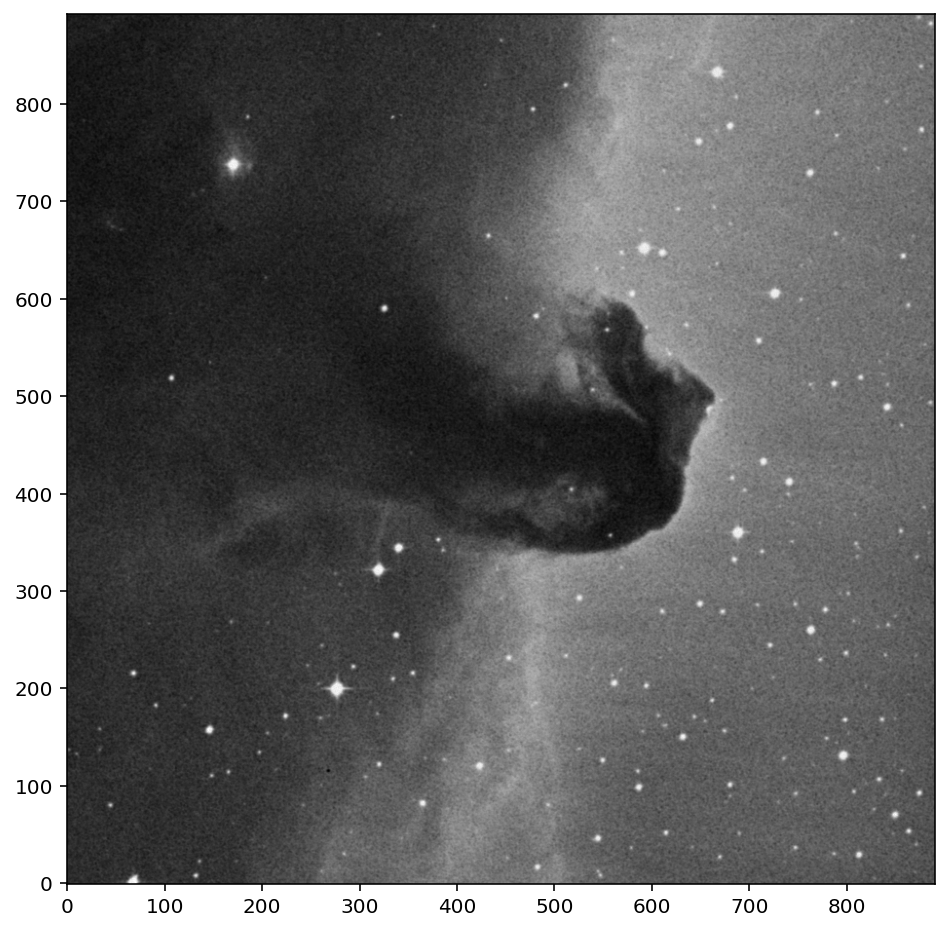

In [3]:
fig, axis = plt.subplots(figsize=(8,8))
implot = axis.imshow(image_data,cmap='gray',origin='lower')
axis.grid(False)
plt.show()

Maybe we want to change the standard colormap? To understand a bit more what's going on here, let's plot a histogram of all the pixel values in the image data:

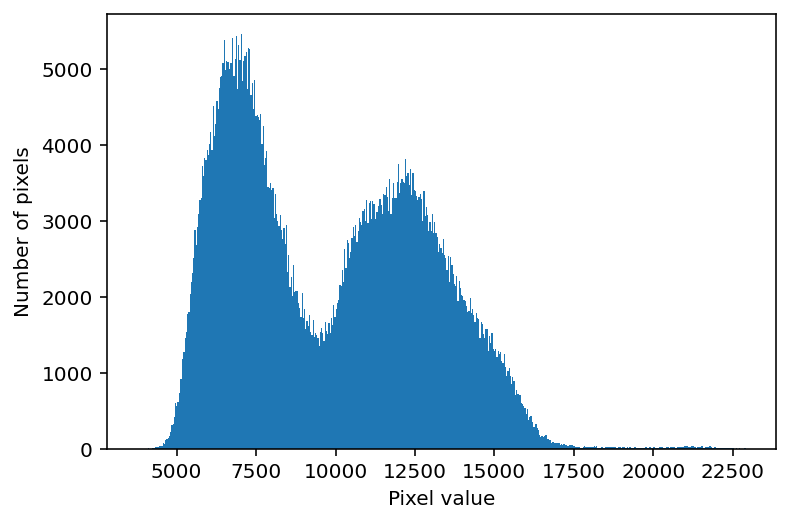

In [4]:
NBINS=500
fig, axis = plt.subplots()

#notice the use of image_data.ravel() to make a 1D array from the 2D array
#without this, we'd get one histogram per row of the image!
axis.hist(image_data.ravel(), NBINS)
axis.set_xlabel('Pixel value')
axis.set_ylabel('Number of pixels')
plt.show()

We can see that the image contains pixel values from roughly 5,000 to nearly 23,000. Most pixels have values of less than 15,000 however. We might want to force 15,000 (and all pixel values higher than that) to display as pure white. We can do that with the ```vmax``` argument:

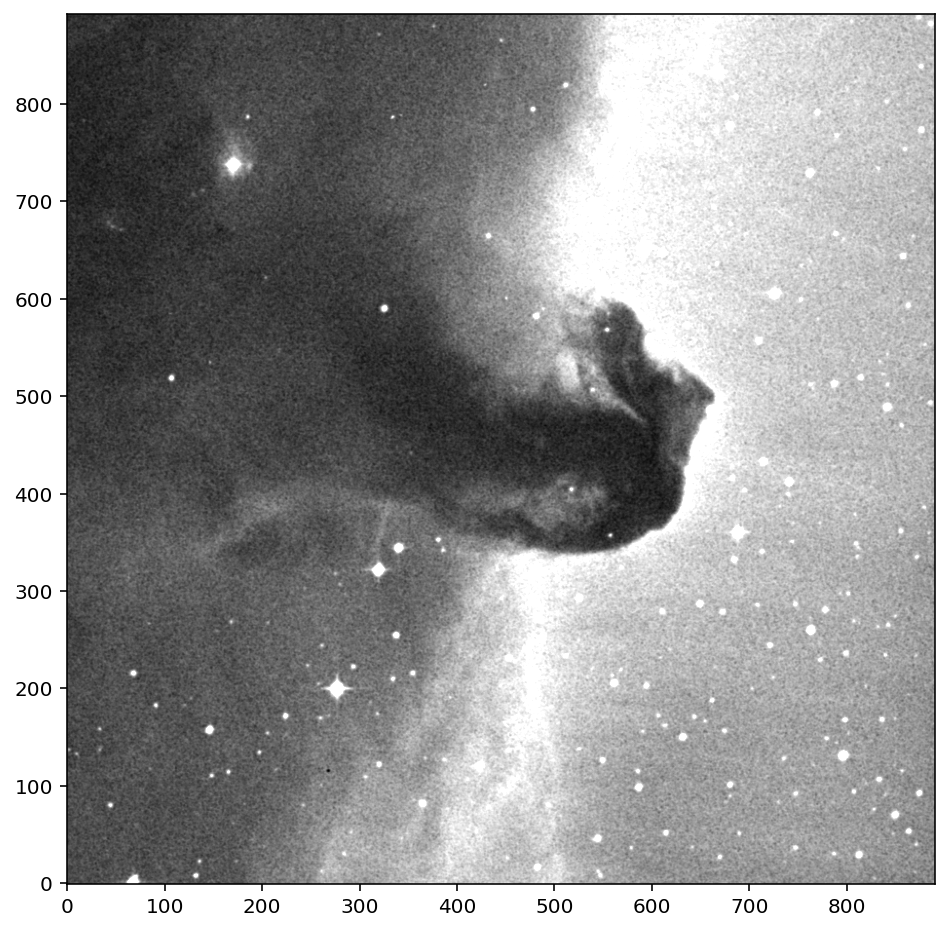

In [5]:
fig, axis = plt.subplots(figsize=(8,8))
implot = axis.imshow(image_data,cmap='gray',origin='lower',vmax=15000)
axis.grid(False)
plt.show()

Notice how we've enhanced the image contrast, but we've lost detail in the brighter regions? We can also choose which value represents pure black with the ```vmin``` argument:

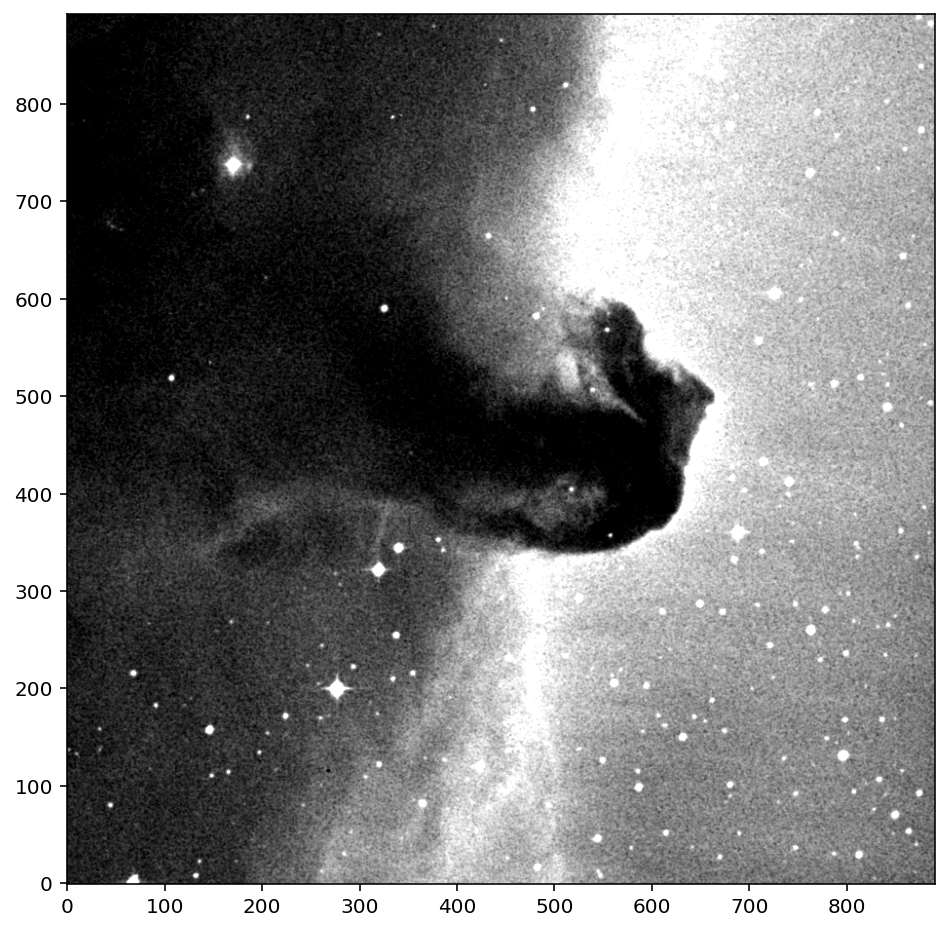

In [6]:
fig, axis = plt.subplots(figsize=(8,8))
implot = axis.imshow(image_data,cmap='gray',origin='lower',vmax=15000,vmin=6000)
axis.grid(False)
plt.show()

### Automatically finding vmin, vmax using percentiles

Numpy has a useful function for finding the percentiles of the values in an array. For example
```np.percentile(image_data,[20])``` would find the value corresponding to the 20th percentile - i.e. 20 percent of all pixels would have a value less than or equal to this value. Most images look quite nice when the black point is set to the 1st percentile and the white point to the 99th percentile. This means the full range of black to white contains most of the data, but the odd outlying low or high pixel won't set our range:

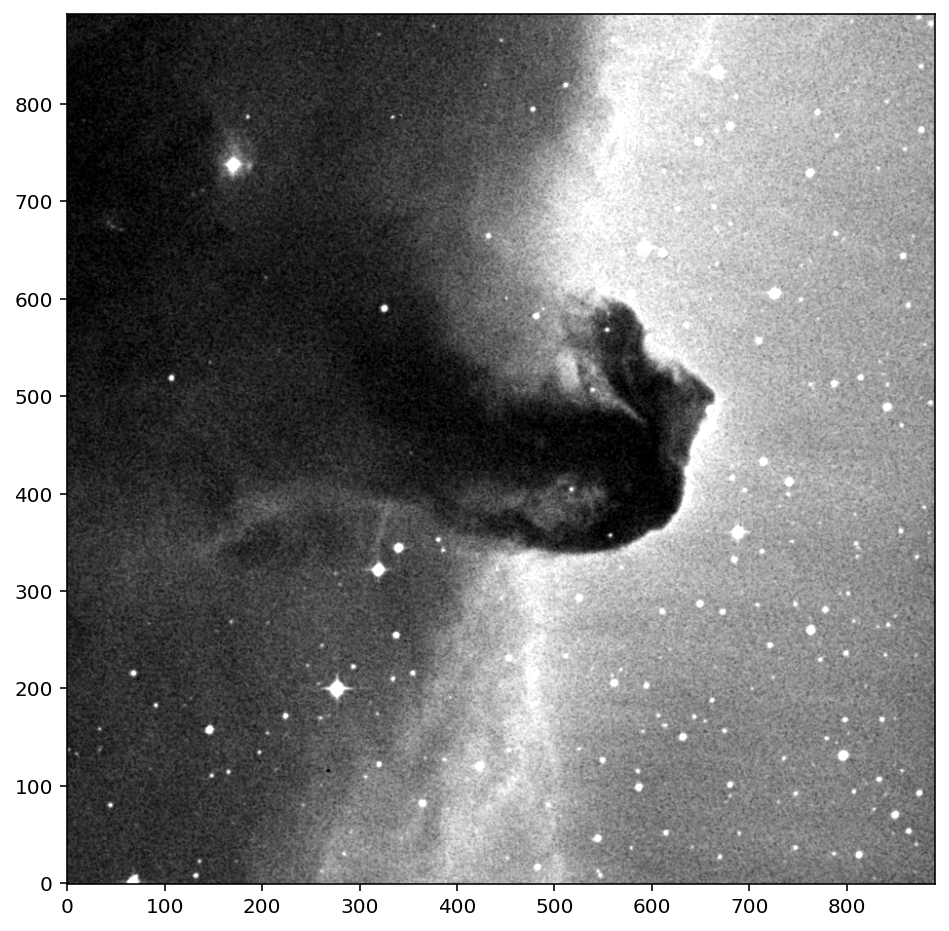

In [7]:
vmin, vmax = np.percentile(image_data, [1,99]) # returns one value for each percentile in list
fig, axis = plt.subplots(figsize=(8,8))
implot = axis.imshow(image_data,cmap='gray',origin='lower',vmax=vmax,vmin=vmin)
axis.grid(False)
plt.show()

### Non-linear scales

All the examples above use a linear scale. If the pixel value doubles, the brightness in the image doubles. Non-linear scales can be used to enhance certain parts of the image. For example, if the output color is logarithmically related to the input value, it can enhance the dark areas:

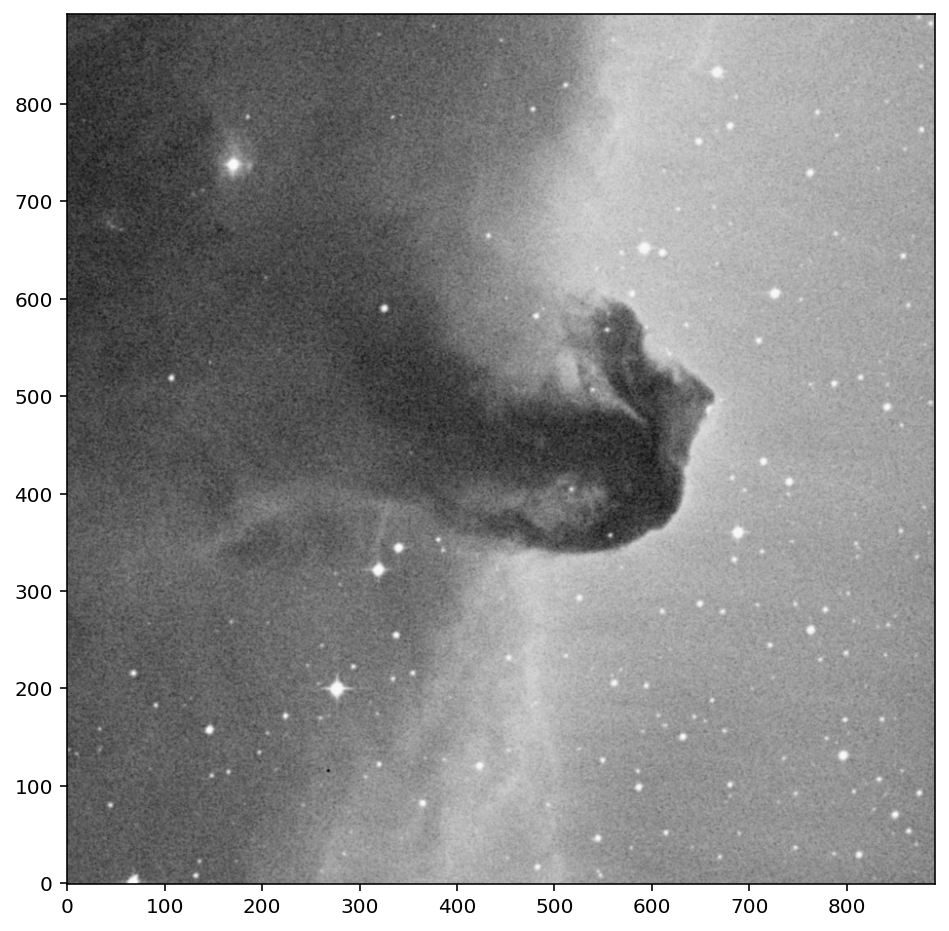

In [8]:
from matplotlib.colors import LogNorm
fig, axis = plt.subplots(figsize=(8,8))
implot = axis.imshow(image_data,cmap='gray',origin='lower',norm=LogNorm())
axis.grid(False)
plt.show()

The astropy library itself contains many useful transformations that are sometimes used to display astronomical images. If you're interested in these, take a look at the [documentation](http://astropy.readthedocs.org/en/stable/visualization/normalization.html#intervals-and-normalization)